# Customer list

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us to use if the results are similar.

We don’t really know if there are other differences between the customers in each group, so anything you can tell us would be really helpful to give some context to what went well.
I need to report to the executive team in 4 weeks. You need to present to me before then so I understand what is going on and what we do next.
Look forward to seeing your presentation.

##  Data Validation
"""
The data set contains 15000 rows and 8 columns before cleaning and validation:

Our first step was to ensure the quality of the data, making sure that they were free from inconsistencies or missing values. This crucial process involved verifying the accuracy and timeliness of the data, identifying and correcting outliers and inconsistencies, which is essential to ensure the reliability of our analysis. We found 1074 NaN values in the 'revenue' column, and we decided to replace them with the number '0' (zero), interpreting these entries as interactions (Company/Customer) without monetary transactions.

From the beginning, we recognized that for any business or company, maximizing their 'revenue' is fundamental. Upon reviewing the columns and finding this variable ('Revenue'), we considered it as the key metric in our exploratory analysis of the data set. We conducted a basic statistical analysis to understand trends and patterns in the data. We found great variability in 'revenue', especially between the 25th and 75th percentiles, indicating the need for further investigation into outliers. We initially identified outliers using methods such as the IQR (Interquartile Range) technique and executed a quick visualization of the distributions of the numerical columns 'nb_sold', 'years_as_customer', 'nb_site_visits', and 'revenue' to better understand their distribution and assess potential outliers.

When graphically analyzing the distributions, we decided to use a logarithmic transformation to smooth and facilitate the perception of trends and future statistical analyses, thus reducing the impact of outliers. We generated new data columns with the applied transformation, preserving the originals for any future need for original information. The new columns were created with the prefix 'log_' to differentiate them from the originals.

Additionally, we opted to use the np.log() function, previously modifying the '0' values to '0.01'. This is because the logarithm of zero is undefined, and by replacing zeros with a small but positive value, we avoid errors in the calculation.

We converted the 'sales_method' and 'state' columns to type 'category', which optimized memory usage and made it easier to manipulate and analyze this categorical data.

We encountered inconsistencies in the 'sales_method' column where the classification criteria should have been limited to three categories as per the pre-established rubric. However, we identified diverse categories such as ['Email', 'Email + Call', 'Call', 'em + call', 'email']. To address this, we standardized these entries using a mapping method, consolidating similar categories and correcting typographical errors to align with the intended classification scheme.

No duplicate values were found in our dataset.

We then organized the DataFrame in ascending order according to the 'week' column. This arrangement was instrumental in enhancing our understanding of the data over the time , from week 1 to 6, and proved beneficial in visualizing sales trends over the six-week program duration.

"week": The data were ordered from lowest to highest during the 6 weeks of the study (from 1 to 6). Although the column is named "week," the values represent weeks. The “nb_site_visits” column was considered to reflect a 6-month collection period, which was taken into account to avoid inconsistencies between the study period and the temporal range of site visits.

"sales_method": Transformations were made to the categories, reducing them from 7 to 3 ('Email', 'Email and call', 'Call'), to align them with the predefined criteria. The column, originally of type "object", was transformed into "category" to optimize the analysis. 


"customer_id": No duplicate or missing values were found, identifying 15,000 unique customers. This finding facilitates individualized analysis of customer purchasing patterns and behavior.

"nb_sold": No inconsistencies were detected in this column representing the number of new products sold. The correlation of this variable with 'revenue' and 'sales_method' was considered for further analysis. 

"revenue": 1074 NaN values were replaced by '0', interpreting these entries as interactions without monetary transactions. (NaN values were replaced with "0", these being understood as interactions between the company and a potential customer that did not result in sales, to later be replaced by a positive value 0.01, and not generate an error in the transformation). No duplicate values were found. Significant variability was observed between quartiles, suggesting the presence of outliers, and a log transformation was considered to smooth the distribution and facilitate analysis. A logarithmic transformation was performed (only to smooth and make easier the perception of trends and future statistical analysis, reducing the impact of outliers when generating graphs), generating new columns of data, preserving the original ones in the case that they were require the original information in the future.

"years_as_customer": No inconsistencies were found in this column. The years of customer tenure were analyzed to assess retention rates and possible acquisition costs, as well as to segment customers according to their tenure and evaluate their transition to digital platforms. A logarithmic transformation was applied to smooth and facilitate the perception of trends and future statistical analysis, creating new columns of data while preserving the original ones for any future needs.

"nb_site_visits": No significant inconsistencies were found. The discrepancy between the time range of this information (6 months) and the study horizon (6 weeks) was addressed to ensure the accuracy of the analysis. A logarithmic transformation was applied with the aim of smoothing and facilitating the perception of trends and future statistical analyses, reducing the impact of outliers when generating graphs. New columns of data were created, maintaining the originals for any future requirements.

"status": No inconsistencies were found in this column. It was transformed from an "object" type to a "category", which allowed for better organization and analysis of the data. This transformation aided in identifying patterns and trends more clearly, especially in analyses involving comparisons or groupings by state.

"log_revenue: This was the column generated by analyzing the outliers in the 'revenue' column, which were transformed with the logarithmic method to smooth out the trends and subsequent graphs if required.

"log_years_as_customer":This was the column generated by analyzing the outliers in the 'years_as_customer' column, which were transformed with the logarithmic method to smooth out the trends and subsequent graphs if required.

"log_nb_site_visits":This was the column generated by analyzing the outliers in the 'log_nb_site_visits' column, which were transformed with the logarithmic method to smooth out the trends and subsequent graphs if required.



After data validation, the data set contains **15000 rows and 11 columns** with no missing values after data transformation and cleaning in the table. Columns generated to facilitate the creation of graphs are not considered in this count.

In [196]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr

In [197]:
df = pd.read_csv("product_sales.csv", delimiter=",")
df.head(0)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [198]:
df.tail(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
14990,2,Call,b8e19654-e5a1-4094-aaa7-99a9821f9c06,9,45.18,0,28,Michigan
14991,2,Email + Call,b5c6d6e0-1237-4785-b088-17064d44d366,10,149.57,1,30,Virginia
14992,5,em + call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York
14993,1,Email,3ec54950-652e-4d8a-bc49-8b5c770c6cd2,8,83.98,2,21,Texas
14994,4,Email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey
14999,5,Email + Call,4e077235-7c17-4054-9997-7a890336a214,13,NaN,4,25,Illinois


In [199]:
print(df.columns)
print(len(df.columns))

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')
8


In [200]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [201]:
df.describe(include="O")

,sales_method,customer_id,state
count,15000,15000,15000
unique,5,15000,50
top,Email,2e72d641-95ac-497b-bbf8-4861764a7097,California
freq,7456,1,1872


In [202]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [203]:
df['revenue'] = df['revenue'].fillna(0)

/Users/italovega/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



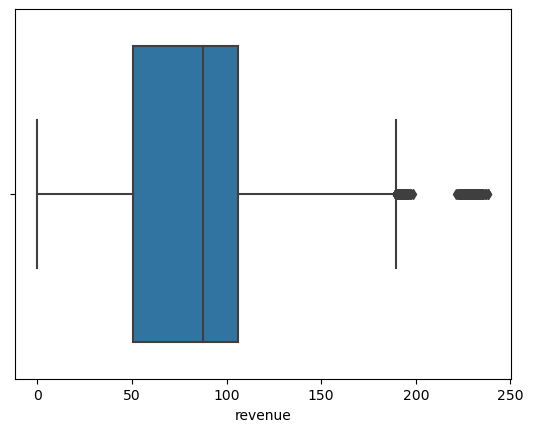

In [204]:

sns.boxplot(df['revenue'],)
plt.show()

In [205]:
print(df["sales_method"].unique())
print("\n")
print(df["state"].unique())


['Email' 'Email + Call' 'Call' 'em + call' 'email']


['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [206]:
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [207]:
df.shape

(15000, 8)

In [208]:
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [209]:
#It should be :Email and call, Call, Email

df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [210]:

mapping = {
    'Email': 'Email',
    'email': 'Email',
    'Email + Call': 'Email and call',
    'em + call': 'Email and call',
    'Call': 'Call'
}


df['sales_method'] = df['sales_method'].map(mapping)

unique_methods = df['sales_method'].unique()
unique_methods


array(['Email', 'Email and call', 'Call'], dtype=object)

In [211]:
df['sales_method'] = df['sales_method'].astype('category')
df['state'] = df['state'].astype('category')

In [212]:
df.dtypes

week                    int64
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object

In [213]:
# Solo hicimos esto para probar que no habia datos duplicados y que el resultado fue correcto.//
#We did this to test that there is no duplicate data and that the result was correct.
missing_values = df[df['sales_method'].isna()]

print(missing_values)


Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [214]:
print(df['week'].max())
print(df['week'].min())

6
1


In [215]:

#data_sorted = df.sort_values(by='week', ascending=True)
df = df.sort_values(by='week', ascending=True)

In [216]:
print(df['revenue'].max())
print(df['revenue'].min())

238.32
0.0


In [217]:
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

#  A.- How many customers were there for each approach?

After adjusting the information and reassigning according to the 3 categories, were quantified, 4962 clients in the "Call" category, 7477 clients  in "Email" category and 2572 clinets in "Email and call". Most of the clients are contacted by e-mail,having the greatest revenue in the analyzed time interval (6 weeks). These outperform their two other alternatives combined. The profit of 'email' exceeds its two other alternatives combined.

In [218]:
customers_methods = df.groupby('sales_method')['customer_id'].nunique()

customers_methods


sales_method
Call              4962
Email             7466
Email and call    2572
Name: customer_id, dtype: int64

In [219]:
df_plot = customers_methods.sort_values().reset_index()
df_plot.columns = ['Sales Method', 'Number of Clients']

fig = px.bar(df_plot, 
             x='Number of Clients', 
             y='Sales Method', 
             orientation='h', 
             color='Sales Method',
             color_discrete_map={
                "Email": "blue",
                "Call": "red",
                "Email and call": "green"},
             text='Number of Clients')

fig.update_layout(title_text="Clients by Sales Method",
                  xaxis_title="Number of Clients",
                  yaxis_title="Sales Method",
                  showlegend=False)
fig.show()

In [220]:
import plotly.express as px


revenue_methods = df.groupby('sales_method')['revenue'].sum()

df_plot_revenue = revenue_methods.sort_values().reset_index()
df_plot_revenue.columns = ['Sales Method', 'Total Revenue']

fig = px.bar(df_plot_revenue, 
             x='Total Revenue', 
             y='Sales Method', 
             orientation='h', 
             color='Sales Method',
             color_discrete_map={
                "Email": "blue",
                "Call": "red",
                "Email and call": "green"},
             text='Total Revenue')

fig.update_traces(texttemplate='%{text:$,.2f}', textposition='inside')

fig.update_layout(title_text="Total Revenue by Sales Method",
                  xaxis_title="Total Revenue  ($)",
                  yaxis_title="Sales Method",
                  showlegend=False)
fig.show()


#  B.-What does the spread of the revenue look like overall? And for each method?

Income ranges vary between $0 and $238.32, with most of these concentrated around $50 and $125. Most transactions are likely to be retail sales (small individual purchases or Wholesale Clients vs. Retailers), but occasionally there are wholesale sales or sales to large customers who buy in large quantities, resulting in significantly higher revenues. Most transactions may involve cheaper products, but occasionally premium or high-margin products are sold. depending for the target. The presence of a positive bias suggests that although most transactions may not be very lucrative in terms of revenue, there is a segment of transactions that are extremely valuable to the company. It is essential to understand what drives those high-value transactions and consider strategies to increase their frequency or capitalize on them more effectively. There are some sales with significantly higher revenues, which could indicate atypical sales or customers buying in large quantities in a range of less than $500.

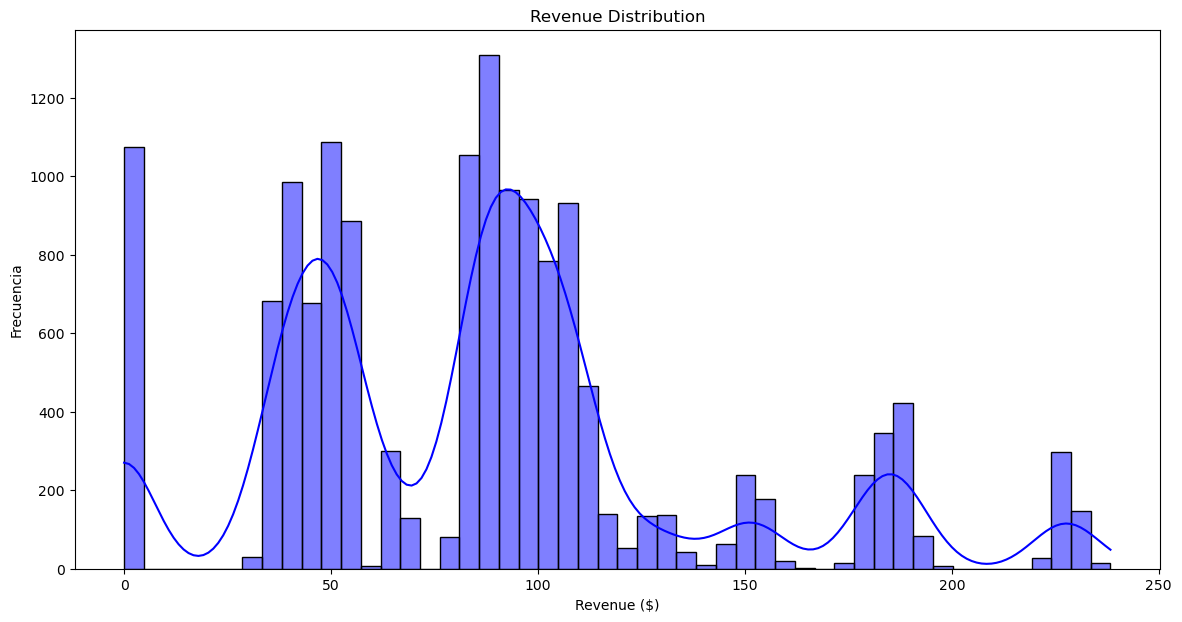

In [221]:
plt.figure(figsize=(14, 7))
sns.histplot(df['revenue'], bins=50, kde=True, color='blue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frecuencia')
plt.show()

In [222]:
df['log_revenue'] = np.log1p(df['revenue'])

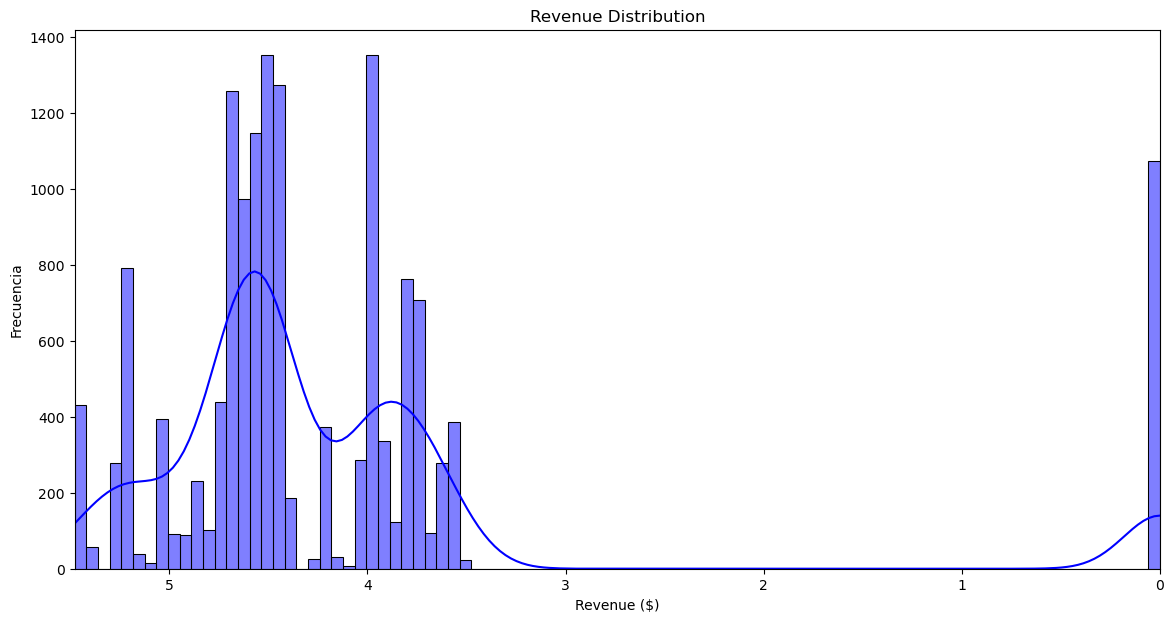

In [223]:
# eje_x= [-1, 0, 50, 100, 150, 200, 250]
# eje_y = [0, 200, 400, 600, 800, 1000, 1200, 1400]
plt.figure(figsize=(14, 7))
sns.histplot(df['log_revenue'], kde=True, color='blue')
plt.xlim(df['log_revenue'].max(), df['log_revenue'].min())  # Invierte el eje x
plt.title('Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frecuencia')

#plt.xlim(df['log_revenue'].max(), df['log_revenue'].min())  # Invierte el eje x
plt.show()

/Users/italovega/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



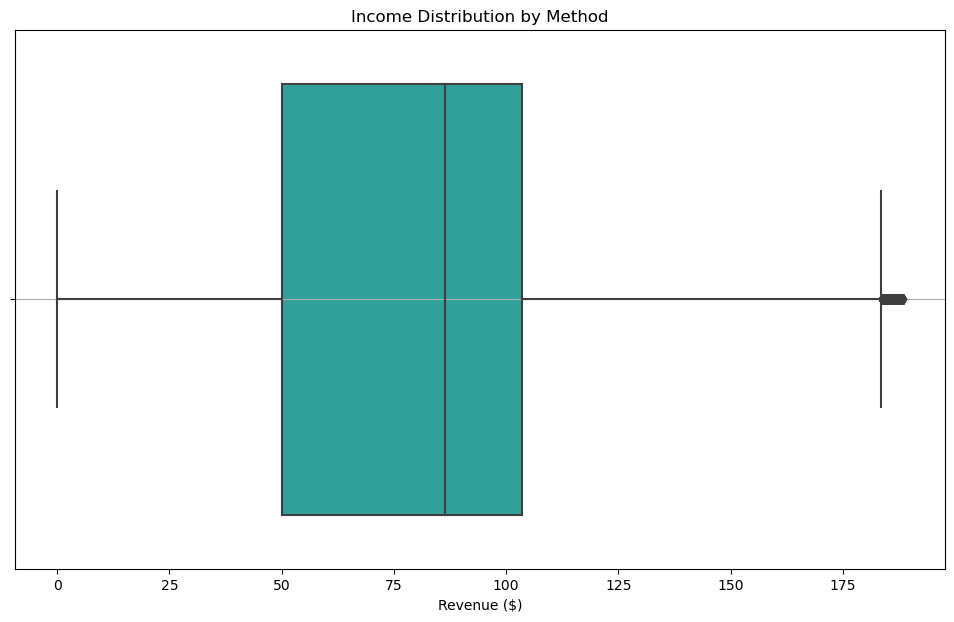

In [224]:
percentile_95 = df['revenue'].quantile(0.95)
data_95_filtered = df[df['revenue'] <= percentile_95]



plt.figure(figsize=(12, 7))
sns.boxplot(data_95_filtered['revenue'], color='lightseagreen')
plt.title('Income Distribution by Method')
plt.xlabel('Revenue ($)')
plt.grid(True, axis='y')
plt.show()

/Users/italovega/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



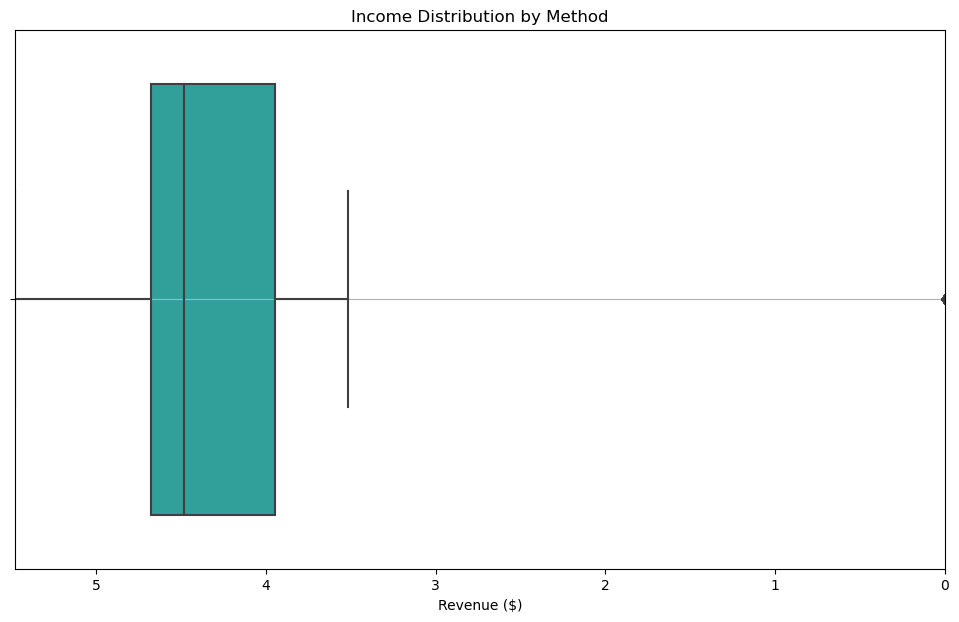

In [225]:
plt.figure(figsize=(12, 7))
sns.boxplot(df['log_revenue'], color='lightseagreen')
plt.xlim(df['log_revenue'].max(), df['log_revenue'].min())  # Invierte el eje x
plt.title('Income Distribution by Method')
plt.xlabel('Revenue ($)')
plt.grid(True, axis='y')
plt.show()

When analyzing the visualization we noticed that the "Email" method has a relatively low median revenue compared to the other two methods. However, it has some extremely high outliers that generate great sales compared to its other two alternatives. Emphasizing that this in turn requires a lower execution cost.
The "Call" method has a higher median income than the "Email" method, but lower than the "Email and Call" method, this may be due to the fact that this methodology falls on the population that has not made or is in the transition. to digitalization, this may only be the fraction of older users (which will be analyzed later).
The "Email and Call" method has the highest median revenue among the three methods, suggesting that this method could be more effective in terms of average revenue per sale, and may be one of the most viable options if distribution is considered. from income.

In [226]:
df["week"]

4773     1
6681     1
13244    1
6680     1
6679     1
        ..
13130    6
3296     6
1694     6
1675     6
4029     6
Name: week, Length: 15000, dtype: int64

In [227]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,log_revenue
4773,1,Email,75b89ff4-0f52-48e7-9656-3a40a4bfc99d,9,94.81,0,24,California,4.562367
6681,1,Email,a16f3b76-d4bd-478e-a832-8e2b6603c342,9,87.19,2,33,Florida,4.479494
13244,1,Email,ecd7b284-2806-4e5b-91b6-3b04b438ea66,9,86.81,1,26,Texas,4.475175
6680,1,Email,3de5a780-83ed-4ad7-b275-e7d13e053723,8,81.38,16,22,Georgia,4.411343
6679,1,Call,68c87c36-5b16-4eab-8735-80030b20c99d,8,40.06,6,22,Iowa,3.715034


# C.-Was there any difference in revenue over time for each of the methods?

By breaking down the three methodologies, you have a general idea of the behavior over time, which can affect the result if taken separately from the context, affecting the final decision.

- "Email" method, a generally stable trend is observed with some fluctuations. The email method shows a slight increase in sales in the first few weeks and then a decrease towards week 6.
- "Call" method shows some variability, but tends to have higher peaks compared to "Email.". Sales through calls show a constant increase from week 1 to week 3 and then stabilize towards week 6.
- "Email + Call" has notable variability and tends to generate higher revenue in some specific weeks. This method shows an ascending pattern from week 1 to week 3, after which there is a slight decrease, but then it increases again towards week 6.


The combination of email and calls seems to be the most effective method in terms of total revenue. However, it is important to also consider the costs associated with each method. For example, the call method and the combined method require more time and effort from the team, which can increase costs

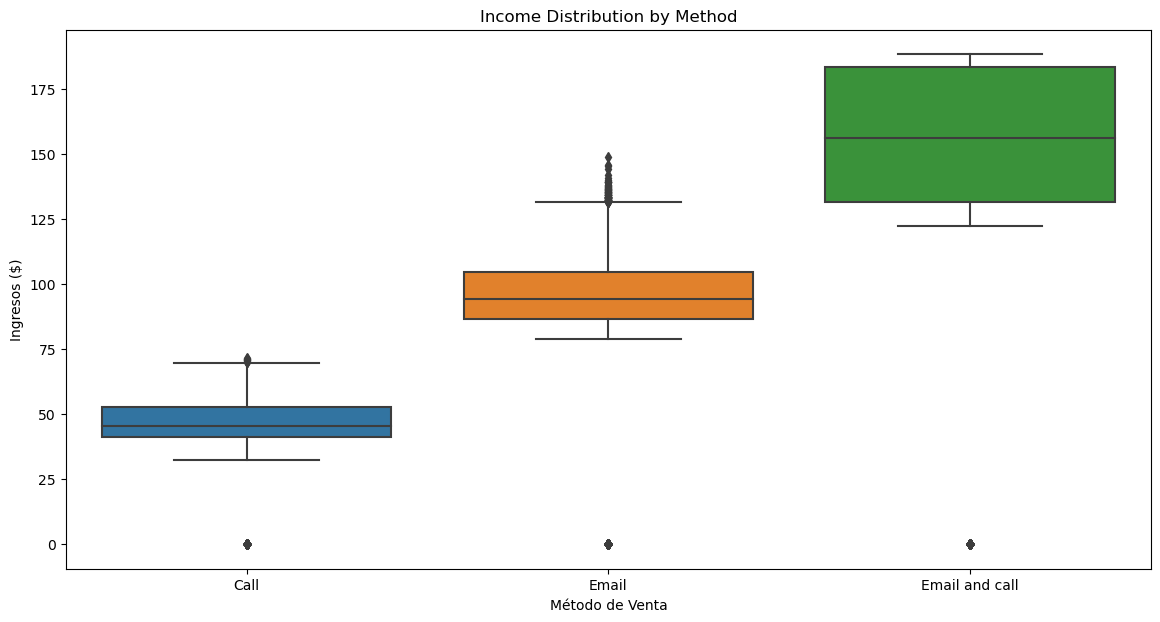

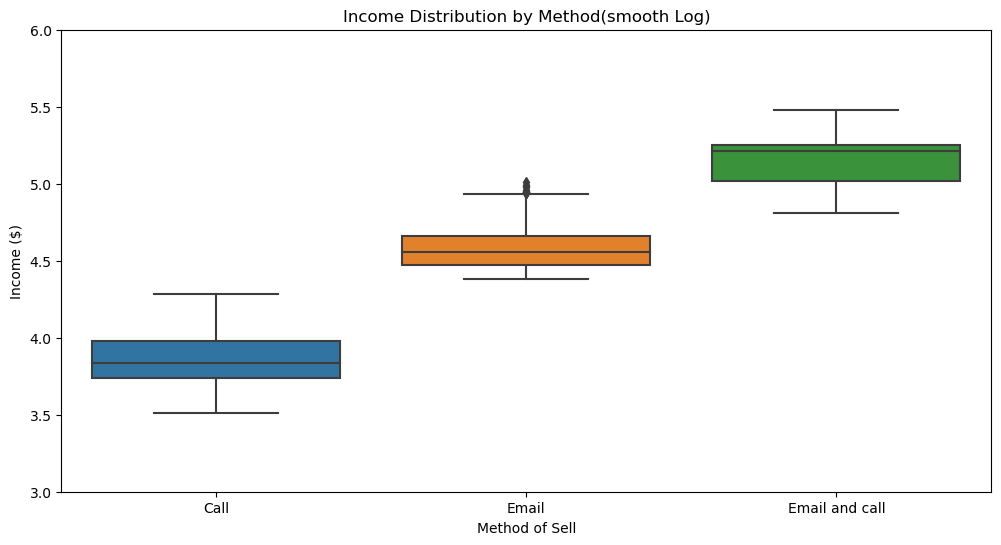

In [228]:
percentile_95 = df['revenue'].quantile(0.95)
data_filtered = df[df['revenue'] <= percentile_95]

plt.figure(figsize=(14, 7))
sns.boxplot(data=data_filtered, x='sales_method', y='revenue')
plt.title('Income Distribution by Method')
plt.xlabel('Método de Venta')
plt.ylabel('Ingresos ($)')
plt.show()



plt.figure(figsize=(12, 6))
sns.boxplot(x='sales_method', y='log_revenue', data=df)
plt.title('Income Distribution by Method(smooth Log)')
plt.xlabel('Method of Sell')
plt.ylim(3, 6)
plt.ylabel('Income ($)')
plt.show()

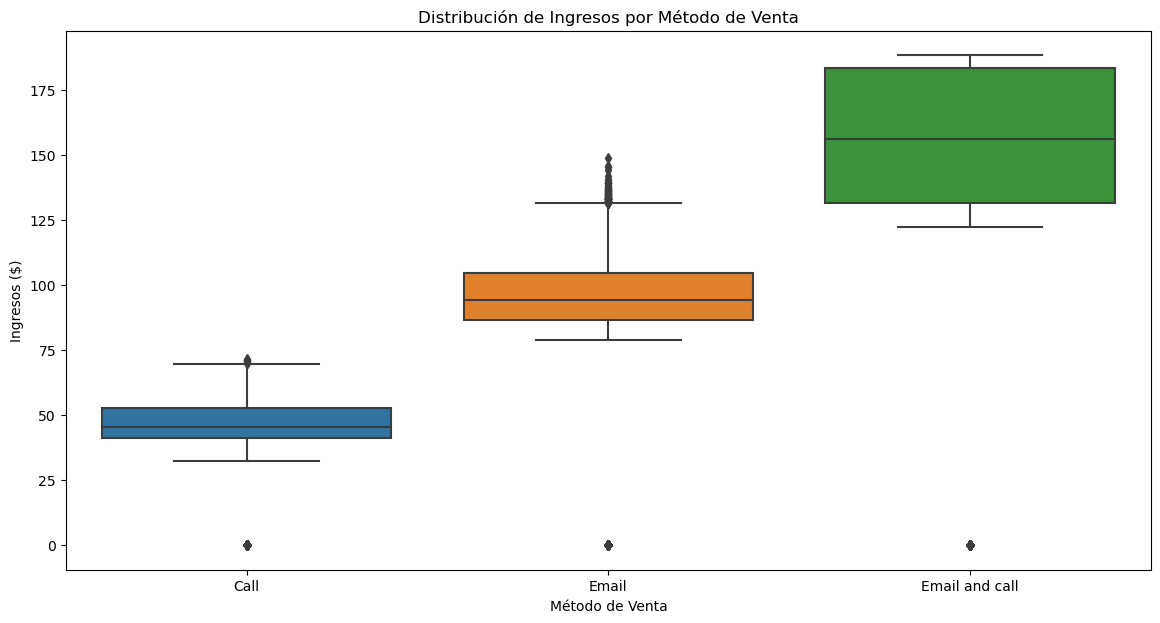

In [229]:

plt.figure(figsize=(14, 7))
sns.boxplot(data=data_filtered, x='sales_method', y='revenue')
plt.title('Distribución de Ingresos por Método de Venta')
plt.xlabel('Método de Venta')
plt.ylabel('Ingresos ($)')
plt.show()

In [230]:

df['revenue'] = df['revenue'].replace(0, 0.01)

df['log_revenue'] = np.log(df['revenue'])


df_transformado_revenue = df['log_revenue'].head()
df_transformado_revenue

4773     4.551875
6681     4.468090
13244    4.463722
6680     4.399130
6679     3.690378
Name: log_revenue, dtype: float64

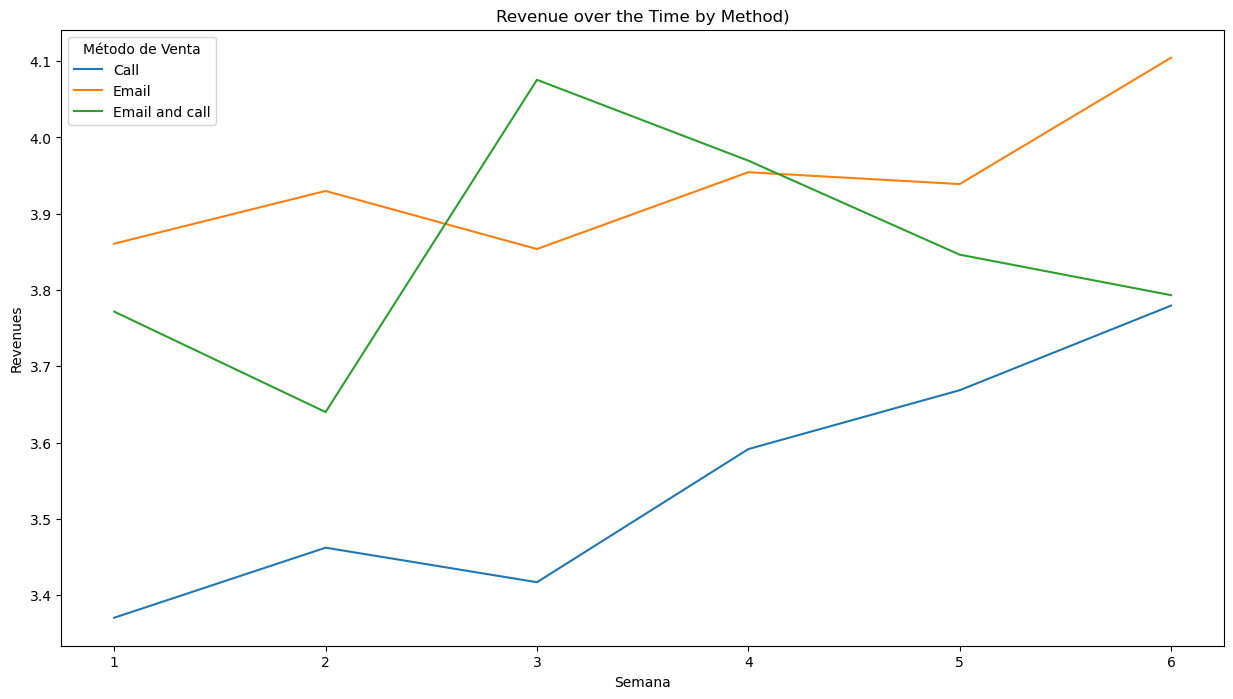

In [231]:
# Crear un gráfico de líneas para mostrar la tendencia de los ingresos por semana y por método de venta
plt.figure(figsize=(15, 8))
sns.lineplot(x='week', y='log_revenue', hue='sales_method', data=df, ci=None)
plt.title('Revenue over the Time by Method)')
plt.xlabel('Semana')
plt.ylabel('Revenues')
plt.legend(title='Método de Venta')
plt.show()

In [242]:

df['log_years_as_customer'] = np.log(df['years_as_customer'])
df['log_nb_site_visits'] = np.log(df['nb_site_visits'])

/Users/italovega/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



# D.-Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

Based on the analysis of the average sales of the 3 methods used, I would recommend focusing on the email methodology, which shows higher income in the 6 weeks of evaluation, even surpassing the sum of its two alternatives, reaching $672,317.83. The other two methods reach a total of only $635,820.18, meaning in many cases a greater investment of time by employees and therefore a greater expense of man hours.
Without leaving aside the fact that these are influenced by new times and digital connectivity, as there is greater coverage and reach of users with technology.
In parallel to the above and as a way to promote customers who can generate the highest percentage of purchases by quantity (not by sales), this must be worked together with a marketing strategy based on 2 pillars which we will detail below. .
- Cross Sellin
- Up Selling


In [243]:
revenue_methods = df.groupby('sales_method')['revenue'].sum()
revenue_methods

sales_method
Call              227565.30
Email             672323.27
Email and call    408260.18
Name: revenue, dtype: float64

In [244]:
suma = 227563.49 + 408256.69
suma

635820.1799999999

In [245]:

total_revenue_per_method = df.groupby('sales_method')['revenue'].sum()
total_customers_per_method = df.groupby('sales_method')['customer_id'].nunique()

print(total_revenue_per_method)
print("\n")
print(total_customers_per_method)

#avg_revenue_per_customer = total_revenue_per_method / total_customers_per_method

#avg_revenue_per_customer.sort_values(ascending=False)


sales_method
Call              227565.30
Email             672323.27
Email and call    408260.18
Name: revenue, dtype: float64


sales_method
Call              4962
Email             7466
Email and call    2572
Name: customer_id, dtype: int64


# Final Estrategy

Based on what was analyzed with their respective analyzes obtained and the context that is proposed, a combined strategy is proposed. It is on the one hand made up of three pillars to enhance existing and new products.(The above depending on the available equipment and context in which this will be carried out.)

In the analysis of the average sales of the 3 methods used, I would recommen focusing on the email , which show as a result having the greatest amount of income for these new products in the 6 weeks of evaluation. Without leaving aside the fact that these are influenced by new times and digital connectivity, as there is greater coverage and reach using these media. IN parallel to the above and as a way to promote clients who can generate the highest percentage of purchases by quantity (not by sales), this must be worked together with a marketing strategy based on 2 pillars which we will detail below.


- Cross Sellin: sell line of office stationery products from the old line, at a lower price, offering new products of a nature related to enabling our customers to be more creative, optimizing margins to obtain profit.
- Up Selling: offer products of the same type as those already sold but of better quality. Alluding to the new line (with a higher price).


It is recommended to Persist with the Email method but with Optimization. This considering that Although email sales have shown a decreasing trend, it is still the method that generated the highest income. It would be wise to investigate the reason for the decline and optimize your email marketing strategy. This could include further segmenting customers, personalizing emails and specific calls (Assessing the Stability of Calls in the analyzed time range), testing different types of content, or even increasing the frequency of emails or analyzing response patterns and distribution of time of sending information.

When analyzing Customer Segmentation, it was observed that the highest concentration of sales, as expected, was from new customers (who may be from lower age ranges: young people), with a greater technological preference. This will be shown below.

The breakdown of sales methods used by the 100 oldest customers:

- Email: 58 clients
- Call: 33 clients
- Email and call: 9 clients

The above reinforces our previous analysis that the best and most effective form of advertising to generate income is email. Since there may be a bias to think that customer loyalty generates greater sales, which in this case is interpreted as newer customers buying more products (being more accessible to technology).

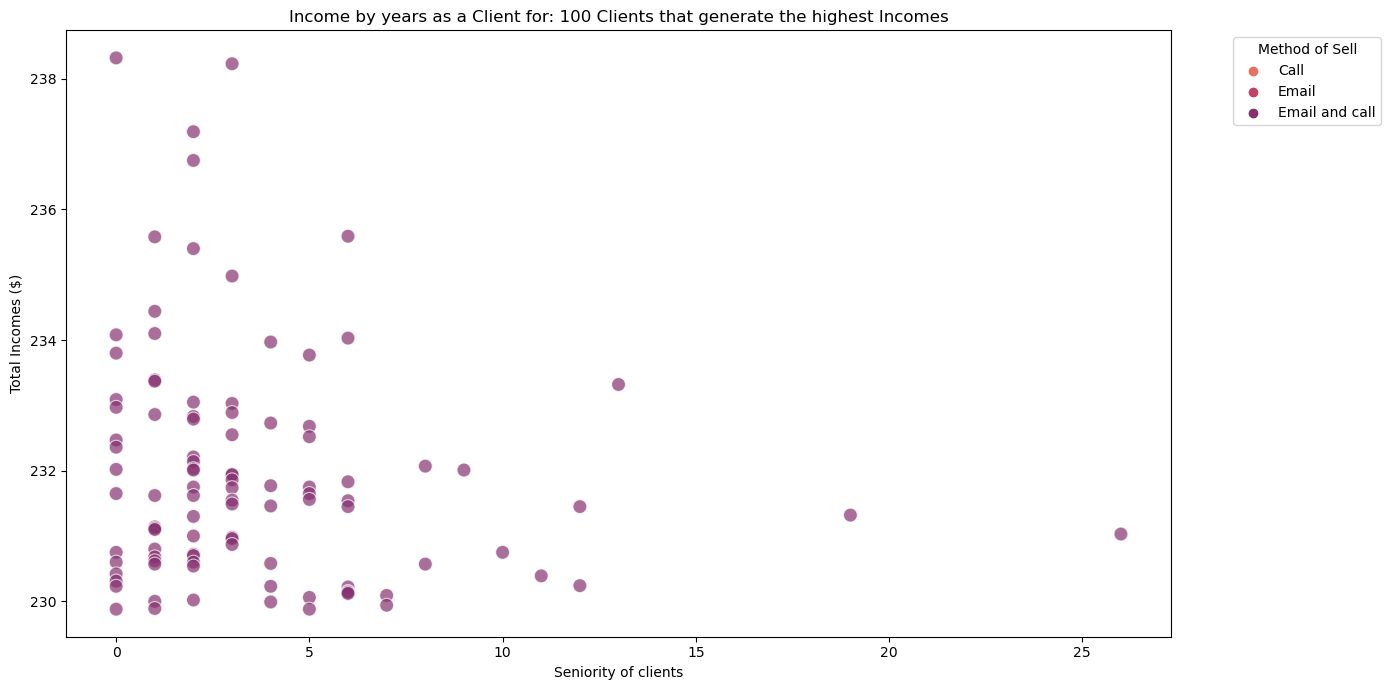

In [246]:
top_100 = df.groupby('customer_id').agg({
    'revenue': 'sum',
    'years_as_customer': 'first',
    'sales_method': 'first'
}).nlargest(100, 'revenue')



plt.figure(figsize=(14, 7))
sns.scatterplot(data=top_100, x='years_as_customer', y='revenue', hue='sales_method', palette='flare', s=100, alpha=0.7)

plt.title('Income by years as a Client for: 100 Clients that generate the highest Incomes')
plt.xlabel('Seniority of clients')
plt.ylabel('Total Incomes ($)')
plt.legend(title='Method of Sell', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [247]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sales_method'], df['years_as_customer'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_val


(124.22554525162313, 0.0018216776908046297)

H0:There is no correlation between the seniority of the clients and the sales method used.

H1:There is a correlation between the seniority of the clients and the sales method used.

In this case, since P=0.00182  is less than 0.05, we would have sufficient evidence to reject H0 and conclude that there is a correlation between the age of the customers and the sales method used.
The "p" value indicates that there is a significant relationship between 'sales_method' and 'years_as_customer'. That is, the sales method is not independent of the years that someone has been a customer. There is sufficiente evidence to to affirm that exist a signifficant relationship between the sales methods and the customer (group) and the clients seniority. 

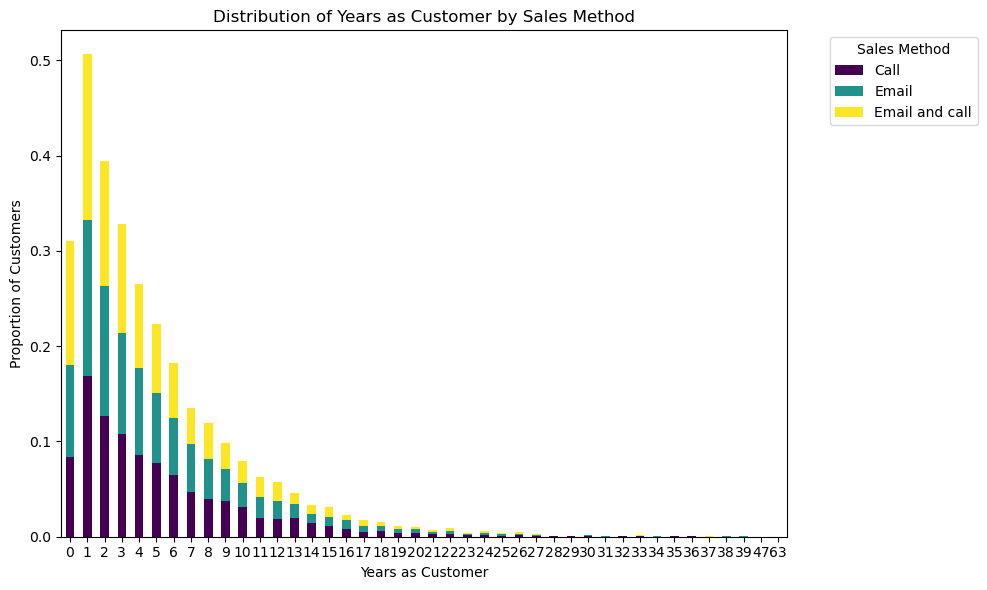

In [248]:
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
ax = normalized_table.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Distribution of Years as Customer by Sales Method')
plt.xlabel('Years as Customer')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.legend(title='Sales Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# RECOMENDATONS

In summary, although the Email method has proven to be the most lucrative so far, it is essential to consider the trends, operational cost and efficiency of each method when deciding on future strategies. Combining data analysis with direct customer feedback.
Some customers, especially older ones, may prefer traditional methods like calls, while others may respond better to emails.

In [249]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,log_revenue,log_years_as_customer,log_nb_site_visits
4773,1,Email,75b89ff4-0f52-48e7-9656-3a40a4bfc99d,9,94.81,0,24,California,4.551875,-inf,3.178054
6681,1,Email,a16f3b76-d4bd-478e-a832-8e2b6603c342,9,87.19,2,33,Florida,4.468090,0.693147,3.496508
13244,1,Email,ecd7b284-2806-4e5b-91b6-3b04b438ea66,9,86.81,1,26,Texas,4.463722,0.000000,3.258097
6680,1,Email,3de5a780-83ed-4ad7-b275-e7d13e053723,8,81.38,16,22,Georgia,4.399130,2.772589,3.091042
6679,1,Call,68c87c36-5b16-4eab-8735-80030b20c99d,8,40.06,6,22,Iowa,3.690378,1.791759,3.091042


In [250]:
df.isna().sum()

week                     0
sales_method             0
customer_id              0
nb_sold                  0
revenue                  0
years_as_customer        0
nb_site_visits           0
state                    0
log_revenue              0
log_years_as_customer    0
log_nb_site_visits       0
dtype: int64